In [107]:
from bokeh.plotting import figure, save
from bokeh.models import ColumnDataSource, HoverTool, LogColorMapper

import matplotlib.pyplot as plt
%matplotlib inline

import geopandas as gpd
from ChernobylUtility import UsefulFunctions as uf

In [108]:
p = figure(title = 'My newest plot')

In [109]:
p

Figure(id='1287', ...)

In [110]:
x_coords = [1, 2, 3, 4]

In [111]:
y_coords = [-1, 3, 7, 8]

In [112]:
p.circle(x = x_coords, y = y_coords, color = 'red', size =  10)

GlyphRenderer(id='1326', ...)

In [113]:
output = 'points.html'
save(obj = p, filename = output)

/Users/Leonard/miniconda3/lib/python3.6/site-packages/bokeh/io/saving.py:125: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/Users/Leonard/miniconda3/lib/python3.6/site-packages/bokeh/io/saving.py:138: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'/Users/Leonard/Desktop/GitDS/Data_Science_Projects/ChernobylAirData/points.html'

In [114]:
# Read in the world map
shapefile =  'ne_50m_admin_0_countries.shp'
world_map = uf.read_world_map(shapefile)

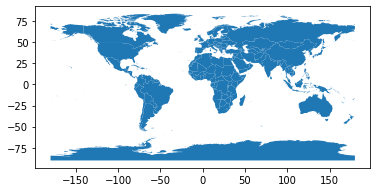

In [115]:
world_map.plot()

In [116]:
world_map

,country,country_code,geometry
0,Zimbabwe,ZW,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Zambia,ZM,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Yemen,YE,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Vietnam,VN,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Venezuela,VE,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."
...,...,...,...
236,Albania,AL,"POLYGON ((19.34238 41.86909, 19.34551 41.91885..."
237,Afghanistan,AF,"POLYGON ((66.52227 37.34849, 66.82773 37.37129..."
238,Siachen Glacier,-99,"POLYGON ((77.04863 35.10991, 77.00449 35.19634..."
239,Antarctica,AQ,"MULTIPOLYGON (((-45.71777 -60.52090, -45.49971..."


In [117]:
world_map.geometry.exterior

0      LINEARRING (31.28789 -22.40205, 31.19727 -22.3...
1      LINEARRING (30.39609 -15.64307, 30.25068 -15.6...
2                                                   None
3                                                   None
4                                                   None
                             ...                        
236    LINEARRING (19.34238 41.86909, 19.34551 41.918...
237    LINEARRING (66.52227 37.34849, 66.82773 37.371...
238    LINEARRING (77.04863 35.10991, 77.00449 35.196...
239                                                 None
240    LINEARRING (-63.12305 18.06895, -63.01118 18.0...
Length: 241, dtype: geometry

In [118]:
def get_poly_coords(row, geom, coord_type):
    """Returns the coordinates ('x' or 'y') of edges of a Polygon exterior
    
    TODO
    """

    # Parse the exterior of the coordinate
    exterior = row[geom].exterior

    if coord_type == 'x':
        # Get the x coordinates of the exterior
        return list( exterior.coords.xy[0] )
    elif coord_type == 'y':
        # Get the y coordinates of the exterior
        return list( exterior.coords.xy[1] )

In [157]:
def get_multi_poly_coords(row, geom, coord_type):
    """ Splits up multipolygons or polygons and returns the x or y coordinates. 
    
    
    """
    
    if type(row[geom]) == MultiPolygon:
        
        coords_list = []
        poly_array = row[geom].explode().values
        
        for polygon in poly_array:
            new_coordinates = get_polygon_coords(polygon, coord_type)
            coords_list.append(new_coordinates)
            
        return coords_list 
    return get_poly_coords(row, geom, coord_type)

In [158]:
def get_polygon_coords(polygon, coord_type):
    """ Take a polygon and outpute its x or y coordinates. 
    
    polygon -> coord type 
    """
    exterior = polygon.exterior
    
    if coord_type == 'x':
        # Get the x coordinates of the exterior
        return list( exterior.coords.xy[0] )
    elif coord_type == 'y':
        # Get the y coordinates of the exterior
        return list( exterior.coords.xy[1] )    

In [165]:
from shapely.geometry import MultiPolygon
import numpy as np

In [169]:
exploded_world_map = world_map.explode().copy()

In [164]:
array_polys = world_map.loc[world_map.country == 'Yemen'].geometry.explode().values
array_polys
for polygon in array_polys:
    print(get_polygon_coords(polygon , 'x'))

[53.08564453125001, 52.58144531250002, 52.44843750000001, 52.327734375000006, 52.2373046875, 52.17402343750001, 52.22207031250002, 52.21748046875001, 52.08730468750002, 51.9658203125, 51.83076171875001, 51.748632812500006, 51.68154296875002, 51.60371093750001, 51.32246093750001, 51.01513671875, 50.52705078125001, 50.33857421875001, 50.16689453125002, 49.906347656250006, 49.54863281250002, 49.34990234375002, 49.10292968750002, 49.04804687500001, 49.00468750000002, 48.9287109375, 48.77998046875001, 48.66835937500002, 48.59375, 48.44902343750002, 48.27783203125, 47.98994140625001, 47.916015625, 47.855078125000006, 47.633398437500006, 47.40771484375, 47.24257812500002, 46.975683593750006, 46.78886718750002, 46.66347656250002, 46.501953125, 46.203125, 45.91972656250002, 45.657324218750006, 45.53398437500002, 45.3935546875, 45.16386718750002, 45.10976562500002, 45.038671875000006, 44.88984375000001, 44.75527343750002, 44.617773437500006, 44.358496093750006, 44.260351562500006, 44.11152343750

In [173]:
exploded_world_map['x'] = exploded_world_map.apply(get_multi_poly_coords, geom='geometry', coord_type='x', axis=1)
exploded_world_map['y'] = exploded_world_map.apply(get_multi_poly_coords, geom='geometry', coord_type='y', axis=1)

In [174]:
world_map_df = exploded_world_map.drop('geometry', axis=1).copy()
world_map_source = ColumnDataSource(world_map_df)

In [175]:
p.patches('x', 'y', source = world_map_source,
         fill_alpha=1.0, line_color="black", line_width=0.05)

GlyphRenderer(id='1560', ...)

In [176]:
output = 'world.html'
save(obj = p, filename = output)

/Users/Leonard/miniconda3/lib/python3.6/site-packages/bokeh/io/saving.py:125: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/Users/Leonard/miniconda3/lib/python3.6/site-packages/bokeh/io/saving.py:138: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'/Users/Leonard/Desktop/GitDS/Data_Science_Projects/ChernobylAirData/world.html'

In [26]:
yemen_xy = world_map.loc[world_map.country == 'Yemen'].geometry.explode()[0].exterior

In [28]:
type(yemen_xy)

shapely.geometry.polygon.LinearRing

In [64]:
type(world_map.loc[world_map.country == 'Yemen']['geometry'].values[0]) == MultiPolygon

True

In [59]:
type(world_map.loc[world_map.country == 'Zimbabwe'].geometry.values[0])

shapely.geometry.polygon.Polygon

In [28]:
senegal = world_map.loc[world_map.country == 'Senegal']

In [29]:
senegal.geometry


66    POLYGON ((-12.28062 14.80903, -12.18652 14.648...
Name: geometry, dtype: geometry

In [30]:
senegal['x'] = senegal.apply(getPolyCoords, geom='geometry', coord_type='x', axis=1)
senegal['y'] = senegal.apply(getPolyCoords, geom='geometry', coord_type='y', axis=1)

/Users/Leonard/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/Leonard/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
senegal_df = senegal.drop('geometry', axis=1).copy()
senegal_source = ColumnDataSource(senegal_df)

In [33]:
p.multi_line('x', 'y', source=senegal_source, color="red", line_width=2)

GlyphRenderer(id='1146', ...)

In [34]:
output = 'senegal.html'
save(obj = p, filename = output)

/Users/Leonard/miniconda3/lib/python3.6/site-packages/bokeh/io/saving.py:125: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/Users/Leonard/miniconda3/lib/python3.6/site-packages/bokeh/io/saving.py:138: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'/Users/Leonard/Desktop/GitDS/Data_Science_Projects/ChernobylAirData/senegal.html'

In [36]:
p.patches('x', 'y', source=senegal_source,
         fill_alpha=1.0, line_color="black", line_width=0.05)

GlyphRenderer(id='1274', ...)

In [37]:
output = 'senegal.html'
save(obj = p, filename = output)

/Users/Leonard/miniconda3/lib/python3.6/site-packages/bokeh/io/saving.py:125: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/Users/Leonard/miniconda3/lib/python3.6/site-packages/bokeh/io/saving.py:138: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'/Users/Leonard/Desktop/GitDS/Data_Science_Projects/ChernobylAirData/senegal.html'